In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
%load_ext autoreload
%autoreload 2

import pandas as pd
from experiment_data import get_experiment_data
from settings import DATA_FOLDER
from utils import display_creative_image

In [4]:
data = get_experiment_data()

users_df size before removing small experiments: 501008 rows
users_df size after removing small experiments: 500953 rows


How many clicks there are for each variation?

In [5]:
data["CLICK"].value_counts()

CLICK
0.5    1965846
0.0     455454
1.0      47357
Name: count, dtype: int64

In [6]:
# Group all experiments in ascending order by their date, for each experiment count the number of clicks in each variation
experiment_variation_clicks = (
    data.query("CLICK == 1")
    .groupby(["EXPERIMENT_ID", "EXPERIMENT_DATE", "VARIATION_ID"])
    ["CLICK"].sum()
    .reset_index()
    .sort_values(["EXPERIMENT_DATE", "EXPERIMENT_ID"])
)
experiment_variation_clicks.set_index(["EXPERIMENT_DATE", "EXPERIMENT_ID"])



VARIATION_ID  \
EXPERIMENT_DATE EXPERIMENT_ID                                                                
2025-07-01      8ea67496-0fb3-4efd-8cea-4b8d88351b8e  2be67f2a-ea10-4a35-8820-249b4a3ad42d   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  77a21e82-ef9f-458f-99ac-312f9a7a7a5c   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  7eb1781e-7042-4282-9a6d-cac182b095b0   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  b83a2f5a-c59f-41ed-84e3-c88ef2cc95c1   
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  ff1592ba-8297-4a6f-bf29-105456db6ca3   
...                                                                                    ...   
2025-10-02      78a802ae-d6cd-4f39-aecb-138668fa2607  e4a621d7-bc90-458b-8e21-92a679cbfeb7   
2025-10-06      0ef6d2e9-7601-4df6-a215-83e6e79aa24e  637fdd90-26ed-42aa-affd-b27e5955b4a4   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  c23f8cfd-1185-4513-aecf-a6f6eb0c3816   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  d33d584d-60a7-4b9d-8993-3d1b6786bc2d   
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  ee313bd7-dea9-4fc7-ab7b-2cf9639e8b04   

                                                      CLICK  
EXPERIMENT_DATE EXPERIMENT_ID                                
2025-07-01      8ea67496-0fb3-4efd-8cea-4b8d88351b8e  639.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  226.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  139.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  440.0  
                8ea67496-0fb3-4efd-8cea-4b8d88351b8e  322.0  
...                                                     ...  
2025-10-02      78a802ae-d6cd-4f39-aecb-138668fa2607  140.0  
2025-10-06      0ef6d2e9-7601-4df6-a215-83e6e79aa24e  210.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  258.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  438.0  
                0ef6d2e9-7601-4df6-a215-83e6e79aa24e  387.0  

[127 rows x 2 columns]

In [7]:
# Sort experiments by date and count number of variations per experiment
experiment_variation_counts = (
    data.groupby(["EXPERIMENT_ID", "EXPERIMENT_DATE"])["VARIATION_ID"]
    .nunique()
    .reset_index(name="num_variations")
    .sort_values(["EXPERIMENT_DATE", "EXPERIMENT_ID"])
)
experiment_variation_counts.set_index(["EXPERIMENT_DATE", "EXPERIMENT_ID"])


,,num_variations
EXPERIMENT_DATE,EXPERIMENT_ID,
2025-07-01,8ea67496-0fb3-4efd-8cea-4b8d88351b8e,5
2025-07-10,81ae4870-e57d-4bc4-a2d7-48ffa5411707,5
2025-07-11,c5288ca2-3928-4364-8f08-bebc1036dd87,5
2025-07-14,3ecf34fc-1f15-4b32-970f-4061544da763,5
2025-07-17,00bb26ff-6fe3-4465-ac77-12bfc33aa6df,5
2025-07-22,6f506df9-be60-452d-b914-8230c29c2ff1,5
2025-07-26,44d26695-cdf2-41a4-b161-393fdaf964bc,5
2025-07-28,002deaf7-331f-4b5e-866b-f6dad60e4a79,5
2025-08-02,e4b4a349-3b14-439e-946f-f716101dac69,4


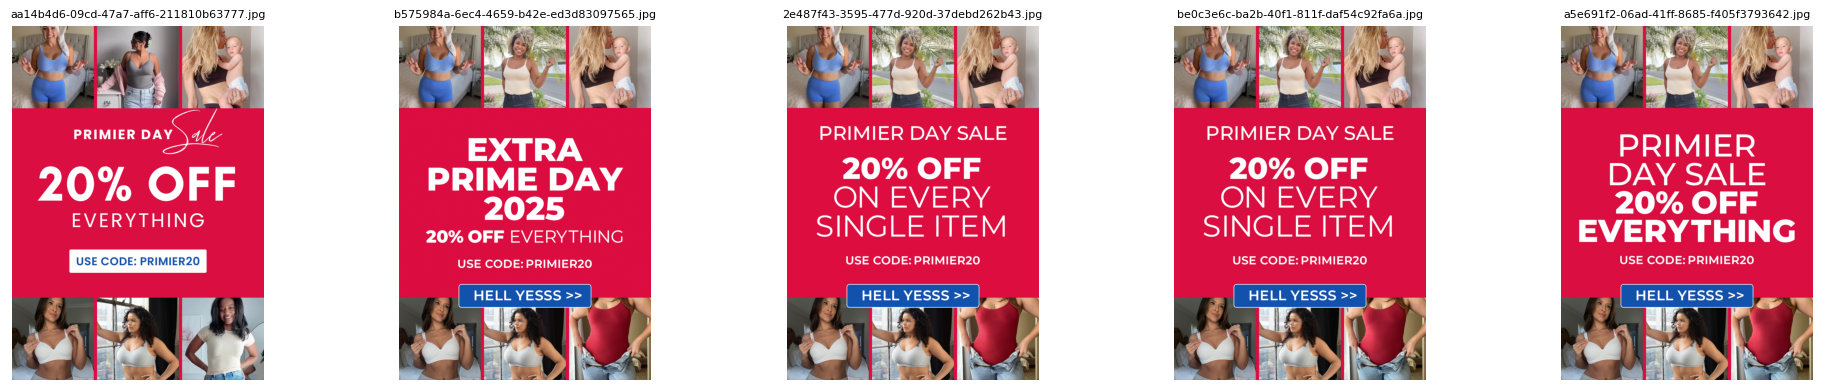

In [5]:
experiment_id = "c5288ca2-3928-4364-8f08-bebc1036dd87"
display_creative_image(experiment_id=experiment_id)

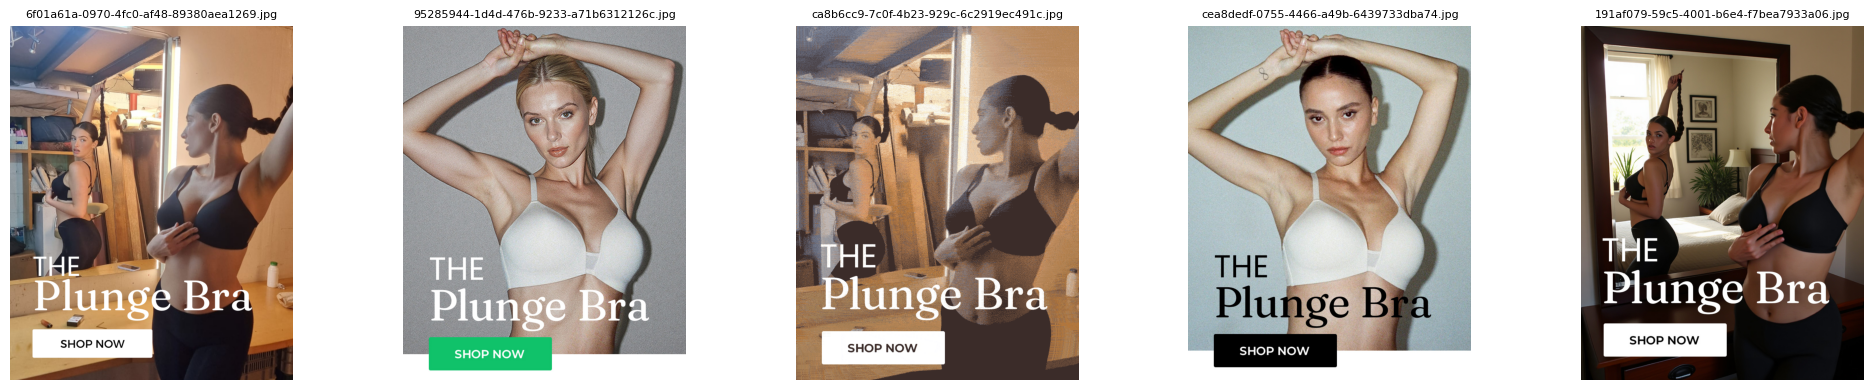

In [14]:
experiment_id = "91eee220-fee7-488b-952a-c96aa8e493db"
display_creative_image(experiment_id=experiment_id)

In [15]:
dataset = pd.read_csv(DATA_FOLDER / "dataset.csv")
image_names = dataset.query(f"experiment_id_creative=='{experiment_id}'")[["id", "image_name", "subject_line"]]
creative_feats = data.query(f"EXPERIMENT_ID == '{experiment_id}'").filter(regex="Q|(^VAR)").drop_duplicates()
creative_feats.set_index("VARIATION_ID").join(image_names.set_index("id"))

,Q1_CREATIVE,Q2_CREATIVE,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q1_SBL,Q2_SBL,image_name,subject_line
VARIATION_ID,,,,,,,,,,,,,,,,,,
5238222f-cb69-4156-871e-321b669fe1e5,Model,UGC,Functional / Product-Focused,Fit & Support,Bra,Everyday Lifestyle,One,26-35,Slim,White,Yes,Frontal,Medium,Headline,Sensory / lifestyle,No,6f01a61a-0970-4fc0-af48-89380aea1269.jpg,The Sexy Plunge You’ll Actually Wear All Day
aa99ec8d-44d9-4687-9536-096627b84b3f,Model,Everyday Lifestyle,Functional / Product-Focused,Fit & Support,Bra,Bedroom / Home,One,18-25,Slim,Brown,Yes,Three-quarter,Medium,Headline,Sensory / lifestyle,No,191af079-59c5-4001-b6e4-f7bea7933a06.jpg,Plunge Into Perfect Fit
5cc84649-9395-4366-8527-cf6803af5c25,Model,UGC,Functional / Product-Focused,Fit & Support,Bra,Mirror / Dressing Room,One,26-35,Slim,Brown,Yes,Three-quarter,Medium,Headline,Sensory / lifestyle,No,ca8b6cc9-7c0f-4b23-929c-6c2919ec491c.jpg,When Sexy Meets Comfort
297b788f-f27f-4876-8c94-f1b98227ac09,Model,Studio,Functional / Product-Focused,Fit & Support,Bra,Studio,One,26-35,Slim,White,Yes,Frontal,Medium,Headline,Sensory / lifestyle,No,95285944-1d4d-476b-9233-a71b6312126c.jpg,Low Cut. High Impact.
3c639014-e182-4f9b-afc2-1791fd05444a,Model,Studio,Promotional / Incentive,Fit & Support,Bra,Studio,One,26-35,Slim,White,Yes,Frontal,Medium,Headline,Sensory / lifestyle,No,cea8dedf-0755-4466-a49b-6439733dba74.jpg,Your All-Day Sexy Bra
